In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
df1=pd.read_csv('Housing.csv')
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [118]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [119]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [120]:
df1['mainroad']=le.fit_transform(df1['mainroad'])
df1['guestroom']=le.fit_transform(df1['guestroom'])
df1['basement']=le.fit_transform(df1['basement'])
df1['hotwaterheating']=le.fit_transform(df1['hotwaterheating'])
df1['airconditioning']=le.fit_transform(df1['airconditioning'])
df1['prefarea']=le.fit_transform(df1['prefarea'])

In [121]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [122]:
status=pd.get_dummies(df1['furnishingstatus'],drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [123]:
df1=pd.concat([df1,status],axis=1)
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [124]:
df1.drop('furnishingstatus',axis=1,inplace=True)

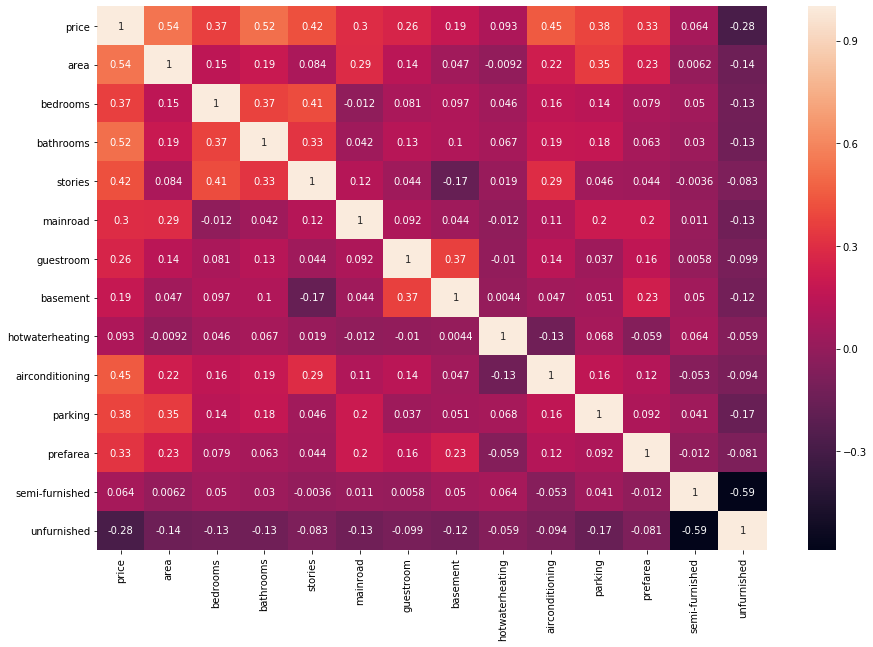

In [125]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)

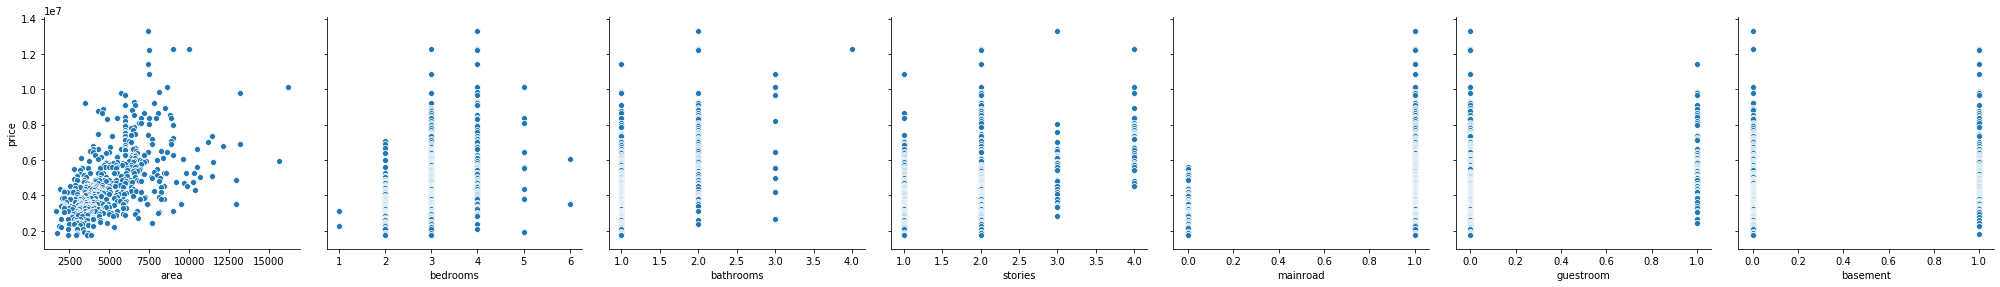

In [126]:
sns.pairplot(df1,x_vars=['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement'],y_vars='price',size=4,aspect=1,kind='scatter')

In [127]:
col=df1.columns

In [128]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc

MinMaxScaler(copy=True, feature_range=(0, 1))

In [129]:
df1=sc.fit_transform(df1)
df1=pd.DataFrame(df1,columns=col)
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0


In [130]:
X=df1.drop('price',axis=1)
y=df1['price']

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [132]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [133]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)
rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [135]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  ###feed data frame


[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 2),
 ('guestroom', False, 3),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', True, 1)]

In [136]:
X_train=X_train.drop(['mainroad','guestroom','semi-furnished'],axis=1)


In [137]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [138]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)
rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [140]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  ###feed data frame


[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('unfurnished', True, 1)]

In [141]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
y_train=list(y_train)
lr=sm.OLS(y_train,X_train_sm).fit()### feed list as input
lr

In [142]:
lr.params

const              0.042563
area               0.356183
bedrooms           0.029434
bathrooms          0.243130
stories            0.130305
basement           0.038779
hotwaterheating    0.090902
airconditioning    0.072135
parking            0.080526
prefarea           0.065828
unfurnished       -0.041732
dtype: float64

In [143]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     85.38
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           9.64e-90
Time:                        10:37:31   Log-Likelihood:                 376.23
No. Observations:                 381   AIC:                            -730.5
Df Residuals:                     370   BIC:                            -687.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0426      0.015     

In [144]:
#check for the VIF value of feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,5.77
0,area,3.82
3,stories,2.76
7,parking,1.90
4,basement,1.78
6,airconditioning,1.77
2,bathrooms,1.67
8,prefarea,1.44
9,unfurnished,1.39
5,hotwaterheating,1.12


In [145]:
X_train=X_train.drop(['bedrooms'],axis=1)

In [146]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [147]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
y_train=list(y_train)
lr=sm.OLS(y_train,X_train_sm).fit()### feed list as input
lr

In [148]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     94.86
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.36e-90
Time:                        10:37:32   Log-Likelihood:                 375.87
No. Observations:                 381   AIC:                            -731.7
Df Residuals:                     371   BIC:                            -692.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0509      0.012     

In [149]:
#check for the VIF value of feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,area,3.10
2,stories,2.05
6,parking,1.87
5,airconditioning,1.77
1,bathrooms,1.64
3,basement,1.56
7,prefarea,1.44
8,unfurnished,1.28
4,hotwaterheating,1.11


### for testing

In [150]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)
y_pred_train=lm.predict(X_train)#check/predect for train data output 

ValueError: shapes (164,13) and (9,) not aligned: 13 (dim 1) != 9 (dim 0)

In [ ]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)#91% data is correct

In [ ]:
metrics.r2_score(y_train,y_pred_train)

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
sns.distplot((y_pred),bins=50)

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
plt.scatter(range(len(y_test)),y_test,color='b')
plt.scatter(range(len(y_pred)),y_pred,color='r')